In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
heart=pd.read_csv('heart_disease_missing.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
5,58,0,2,119.900334,339.874109,0,1.0,NaN,0,-0.080278,2.0,0,2.035667,1
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1
7,58,1,1,119.924599,284.008194,0,0.0,159.850624,0,1.718823,1.0,0,2.060892,0
8,57,1,0,140.080577,192.215185,0,1.0,148.025188,0,0.436121,1.0,0,0.931512,1
9,62,1,0,119.963981,267.062360,0,1.0,98.844968,1,1.740426,1.0,2,3.042729,0


# Question 1 : Data Exploration

###### Removing the noise from the 'thal' feature

Here, thal is a categorical variable and cannot be in a float type data. This noise we need to rectify

Referring to data : thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)

For removing the noise , we have changed the values to integar

In [11]:
heart['thal']=heart['thal'].round()

In [12]:
heart[(heart['thal']>3)]['thal'] 
# we are checking that the output is not exceeding 3, as we are having categories (0,1,2,3)

Series([], Name: thal, dtype: float64)

Our output result do not have noise now.

In [13]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
5,58,0,2,119.900334,339.874109,0,1.0,NaN,0,-0.080278,2.0,0,2.0,1
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,2.0,1
7,58,1,1,119.924599,284.008194,0,0.0,159.850624,0,1.718823,1.0,0,2.0,0
8,57,1,0,140.080577,192.215185,0,1.0,148.025188,0,0.436121,1.0,0,1.0,1
9,62,1,0,119.963981,267.062360,0,1.0,98.844968,1,1.740426,1.0,2,3.0,0


### CM1 : Question 1.1 and 1.2

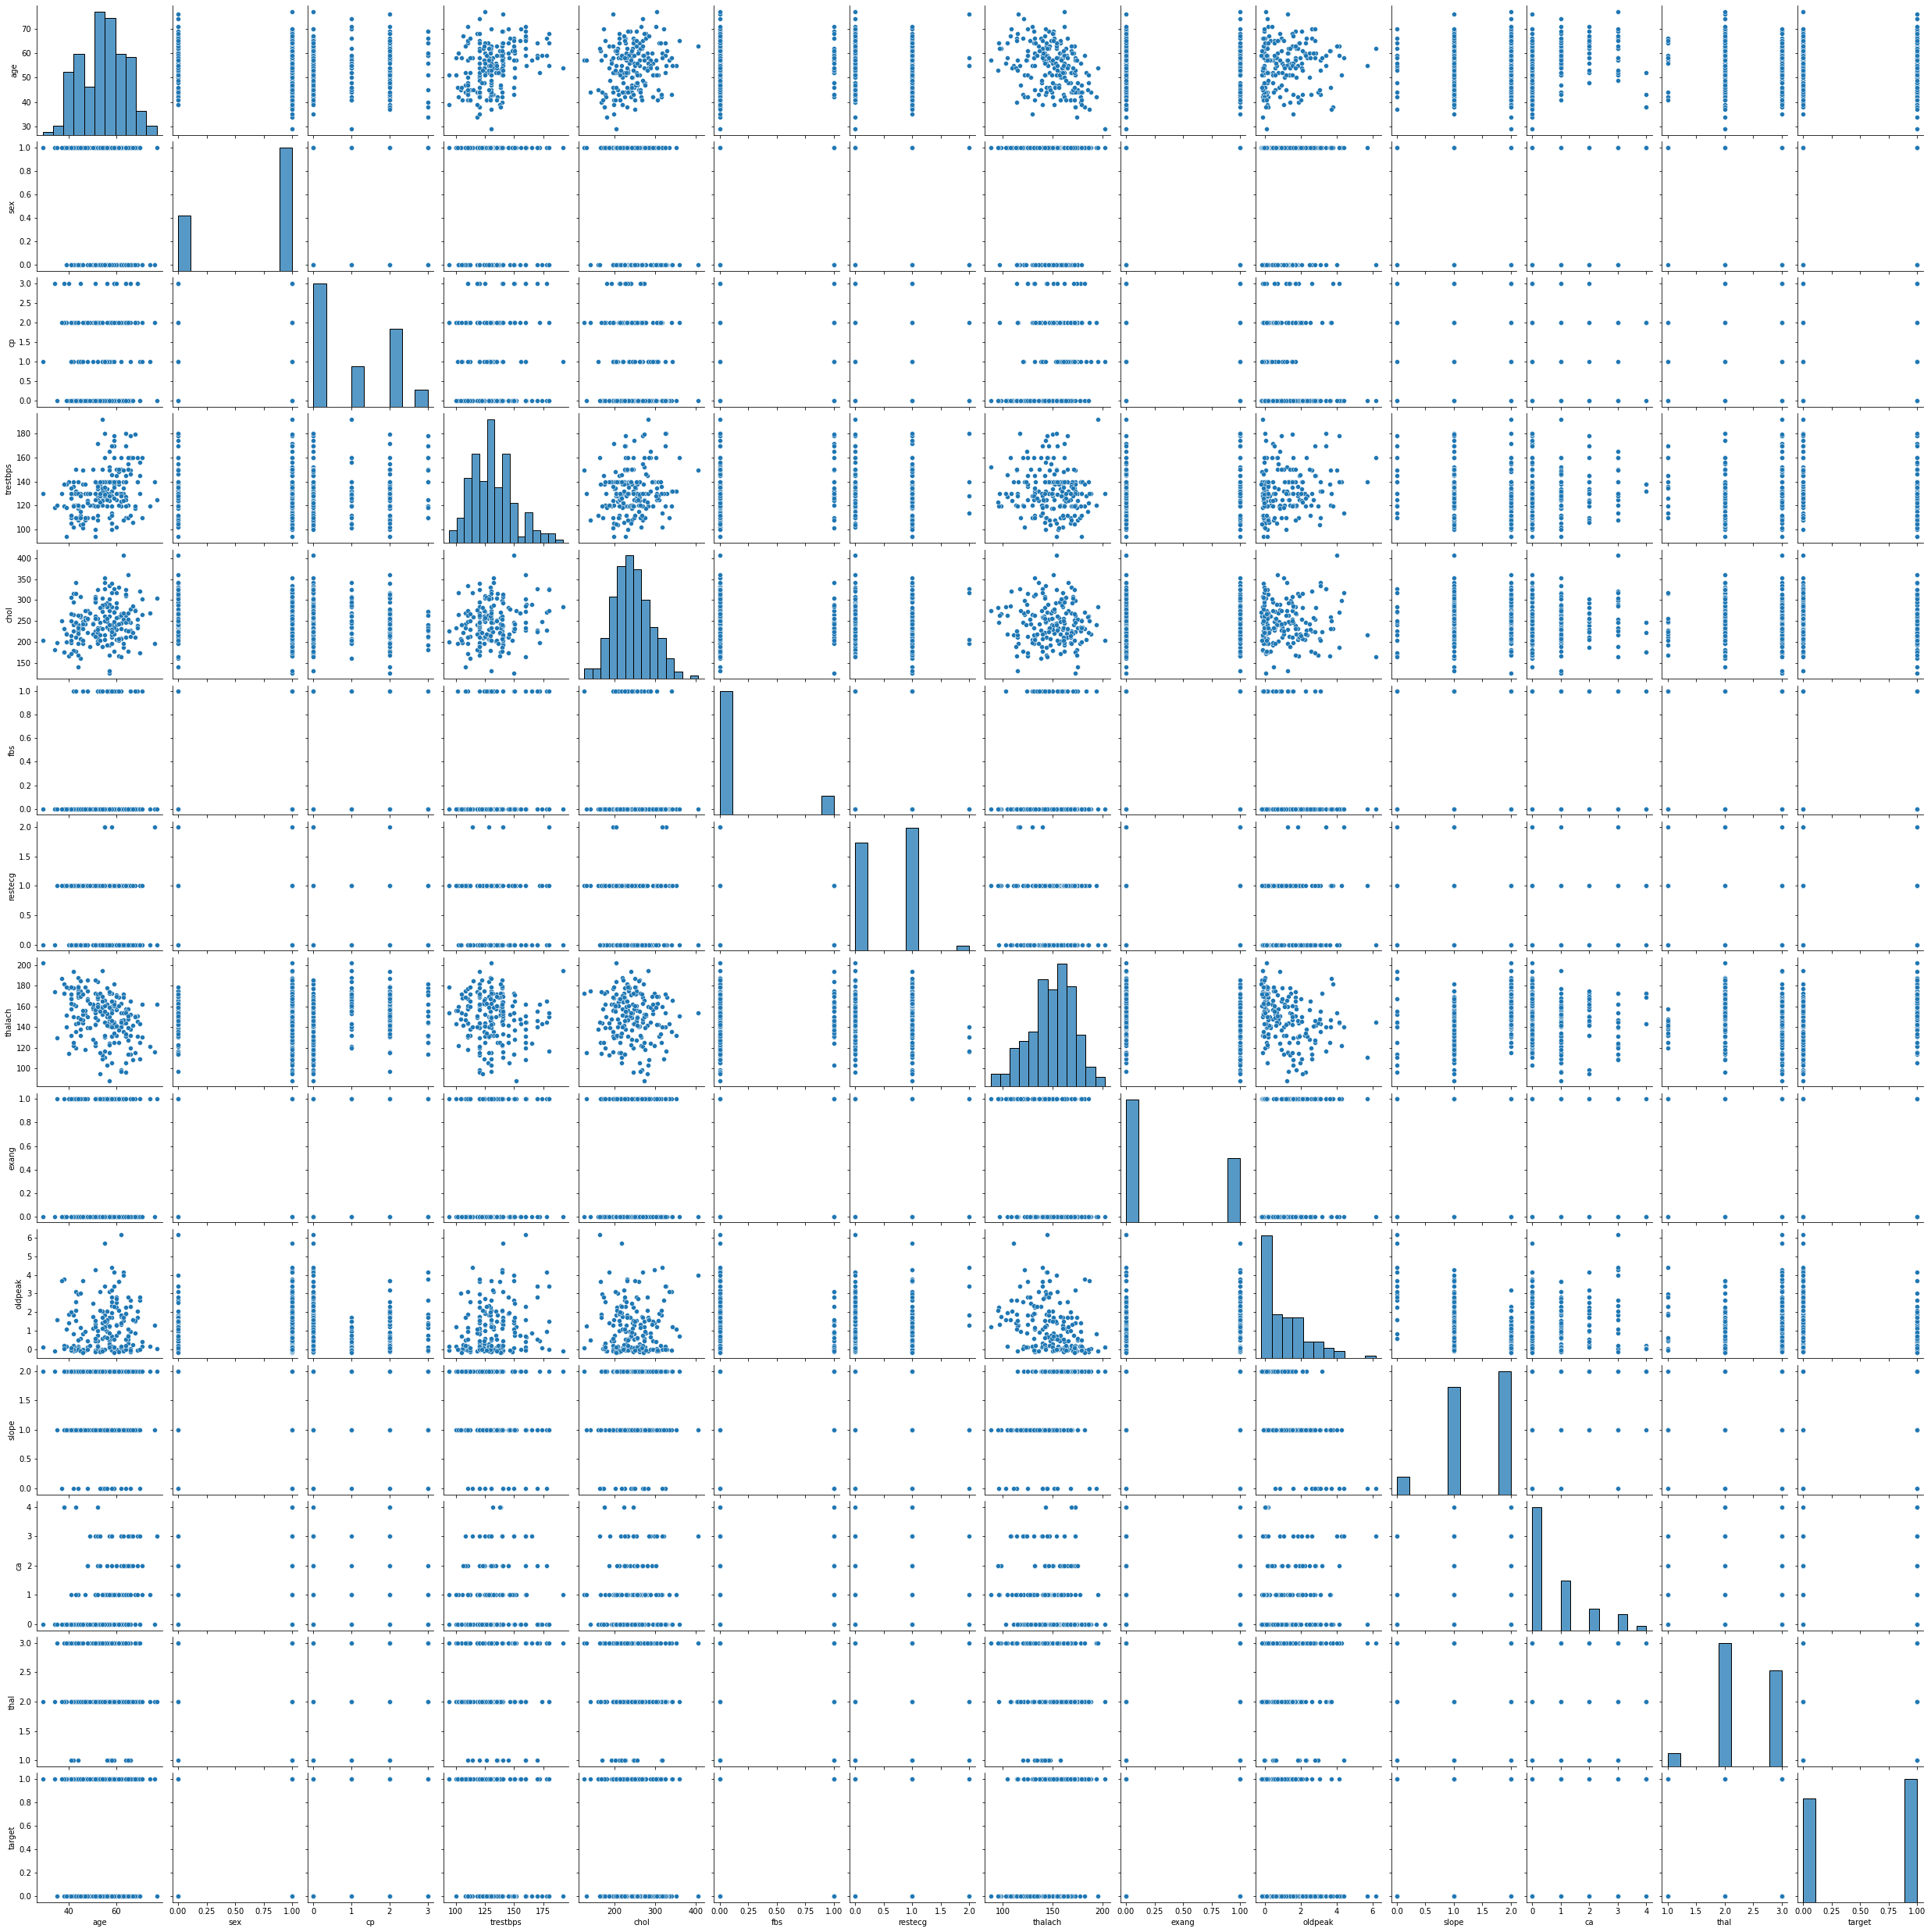

In [14]:
pp=sns.pairplot(heart)

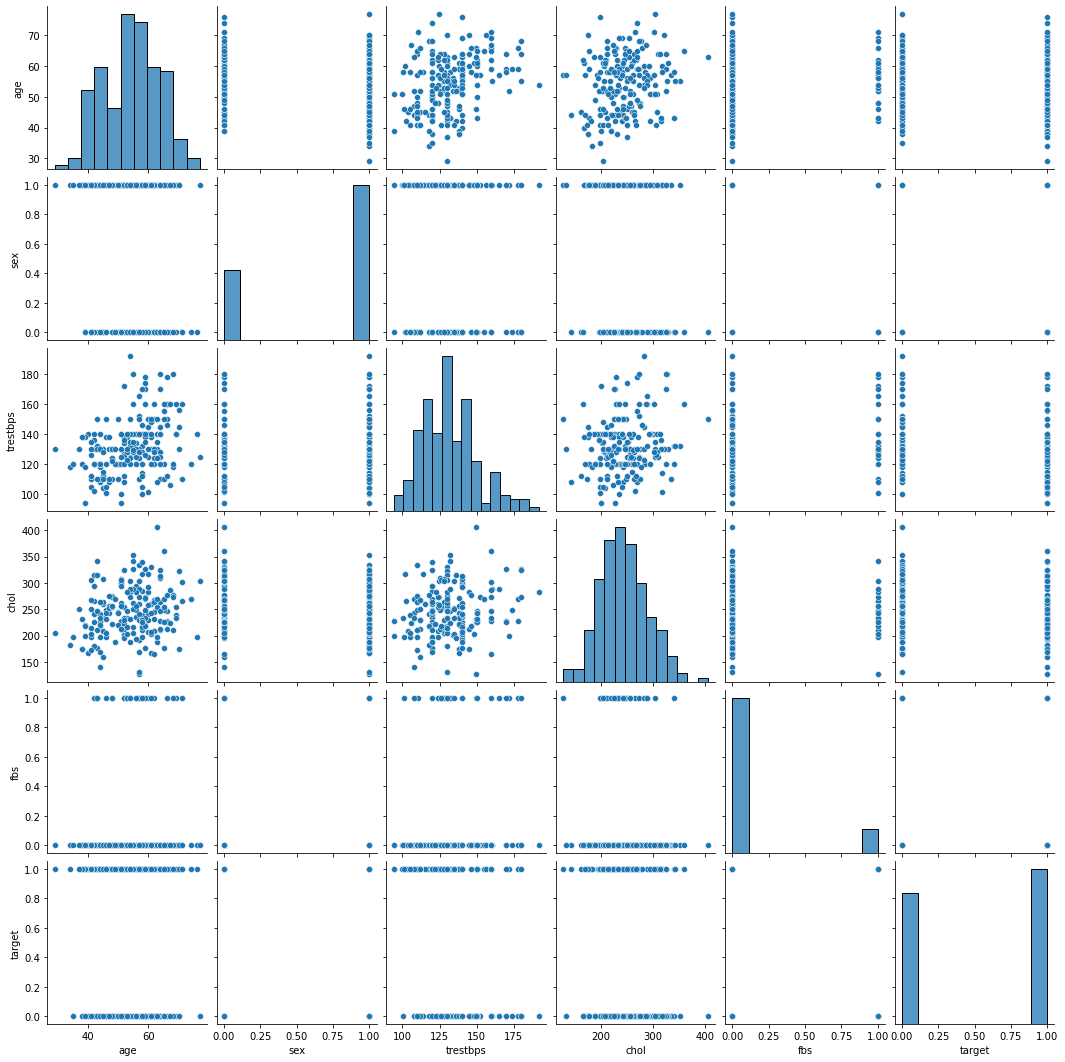

In [16]:
sns.pairplot(heart, vars= ['age','sex','trestbps','chol','fbs','target'])

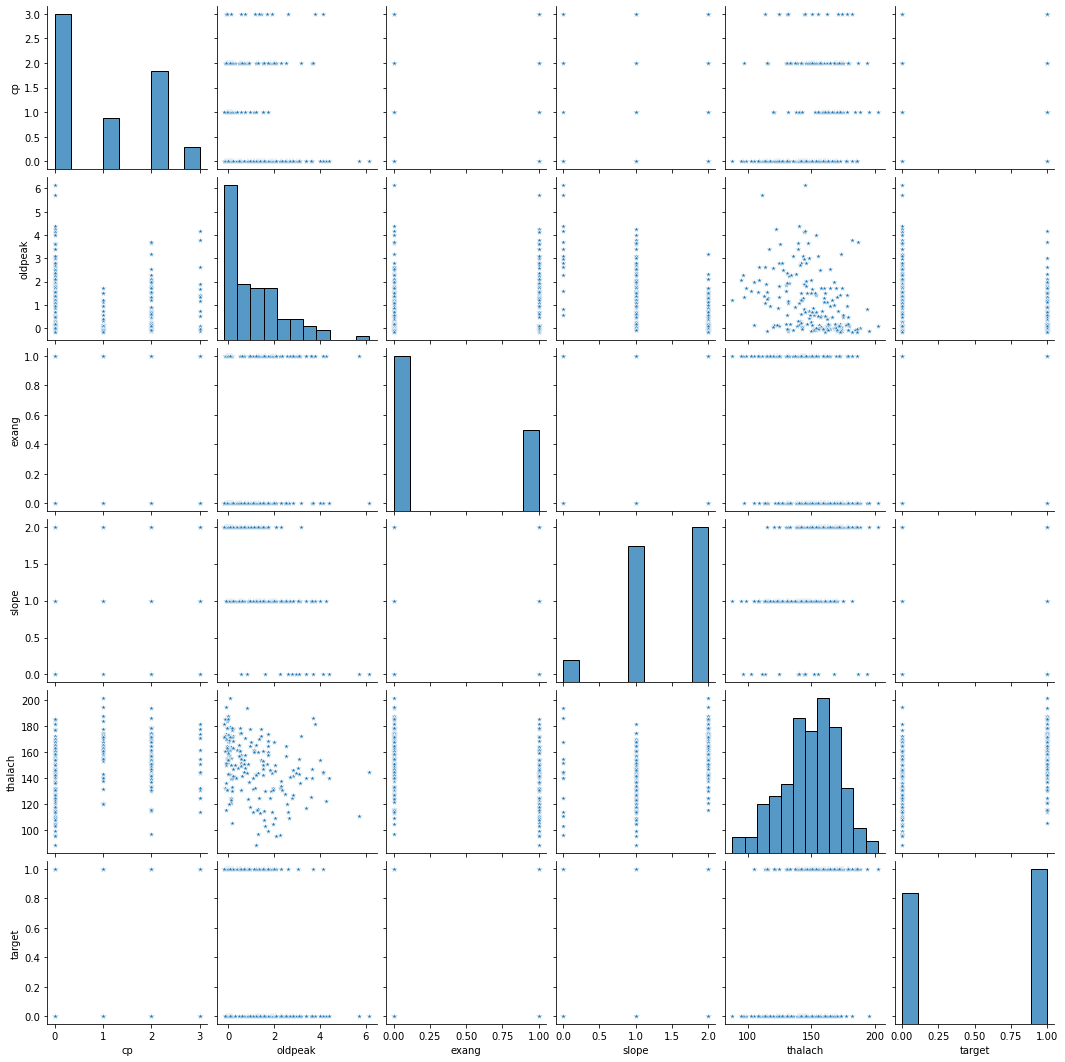

In [17]:
sns.pairplot(heart,markers="*", vars= ['cp','oldpeak','exang','slope','thalach','target'])

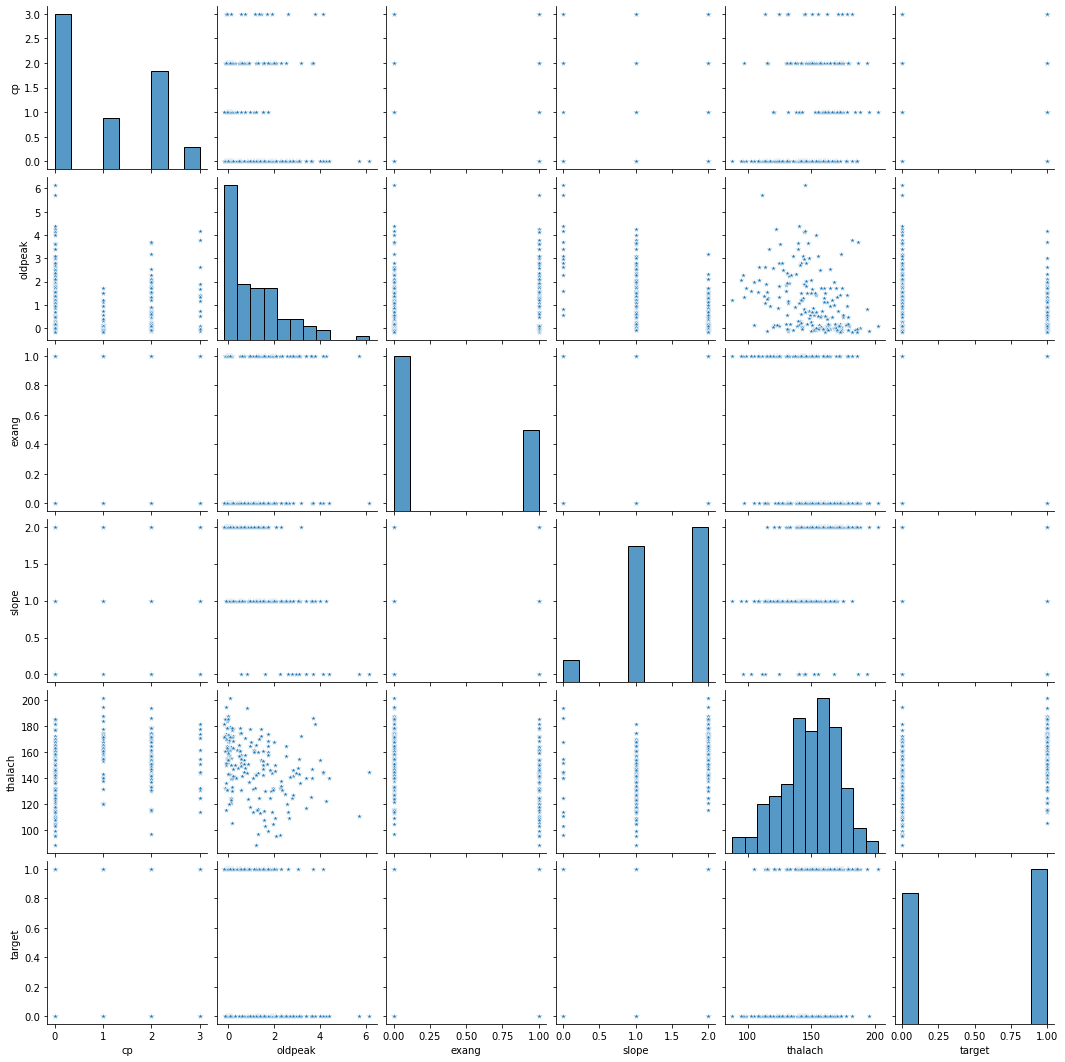

In [19]:
sns.pairplot(heart,markers="*", vars= ['cp','oldpeak','exang','slope','thalach','target'])

Heart dataset contains 13 different features to decide whether a person is suffering from heart disease or not.

Target =0 means the person is not suffering from heart disease and target= 1 means the person is suffering from heart disease.

From the pairplot, it can be seen that five features i.e. CP, thalach, oldpeak, exang and slope shows interesting patterns and 'correlation'. So, these features are to be taken into consideration while doing the further analysis

### CM2 :
[Question 1.3]

In [20]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.355450,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.586926,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.000000,1.000000


In [21]:
heart.info() #To check the null values, data type in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


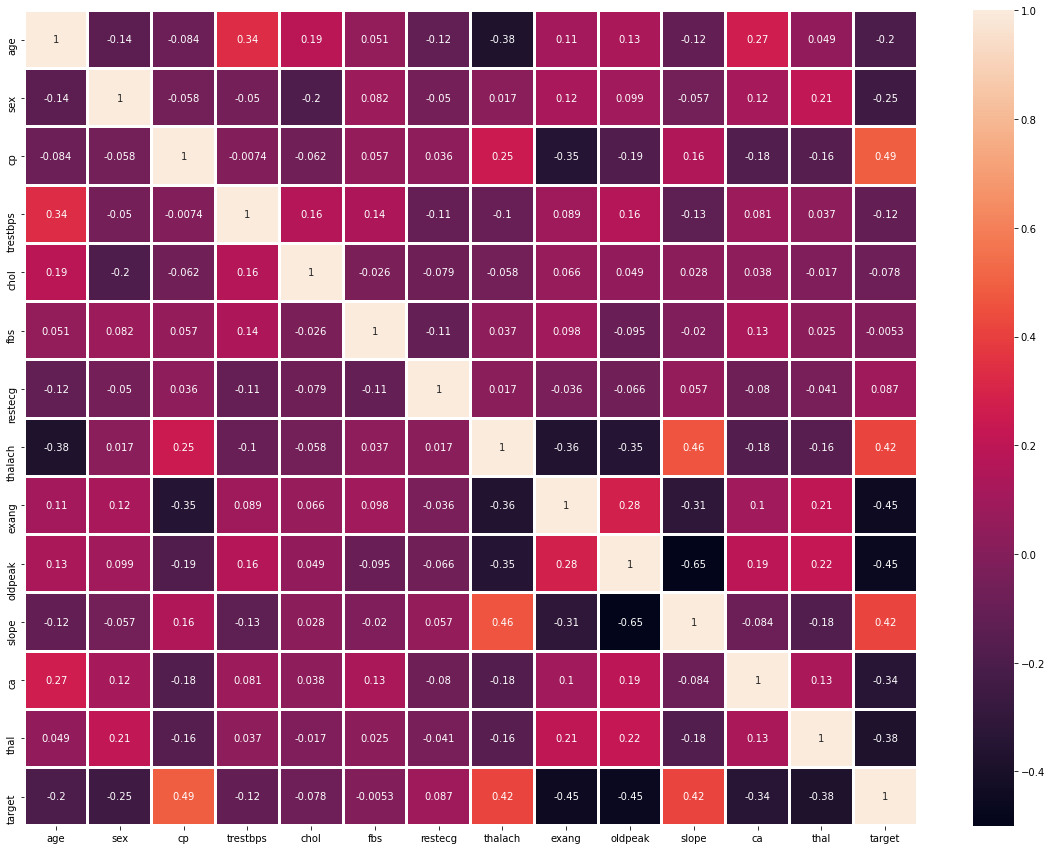

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(heart.corr(), annot=True , linecolor='white',linewidth='2', vmin='-0.5',vmax='1'); # For correlation matrix

In [23]:
print("Correlation Matrix:")
print(heart.corr())
print()

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.140074 -0.084230  0.335944  0.185861  0.050823   
sex      -0.140074  1.000000 -0.057939 -0.049906 -0.195213  0.081750   
cp       -0.084230 -0.057939  1.000000 -0.007449 -0.061591  0.057205   
trestbps  0.335944 -0.049906 -0.007449  1.000000  0.162162  0.138907   
chol      0.185861 -0.195213 -0.061591  0.162162  1.000000 -0.025549   
fbs       0.050823  0.081750  0.057205  0.138907 -0.025549  1.000000   
restecg  -0.124819 -0.050203  0.035935 -0.106940 -0.079196 -0.110983   
thalach  -0.382280  0.017446  0.246019 -0.100284 -0.057679  0.036934   
exang     0.114545  0.122773 -0.349369  0.088717  0.065738  0.098474   
oldpeak   0.131735  0.098912 -0.187518  0.164742  0.048991 -0.094862   
slope    -0.117989 -0.057160  0.156145 -0.134180  0.028301 -0.019514   
ca        0.266278  0.120466 -0.180350  0.080824  0.037820  0.128097   
thal      0.048844  0.212204 -0.162241  0.03

Plotting a correlation matrix using seaborn heatmap depicts that the correlation coefficient for target and 'cp' is the highest i.e. 0.49. Also, the next best correlation coefficient is for 'thalach' and target (0.42) and 'slope' and target (0.42). Moreover, features 'exang' and 'oldpeak' are negatively correlated with the target (-0.45) which means that with the increase in the value of one feature the value of other feature decreases.

Considering that, we have selected 5 features [ 'cp','oldpeak','exang','slope','thalach' ] 

##### We are considering CP, Oldpeak, exang, slope,thalach as these 5 variables having max. correlation to Target"

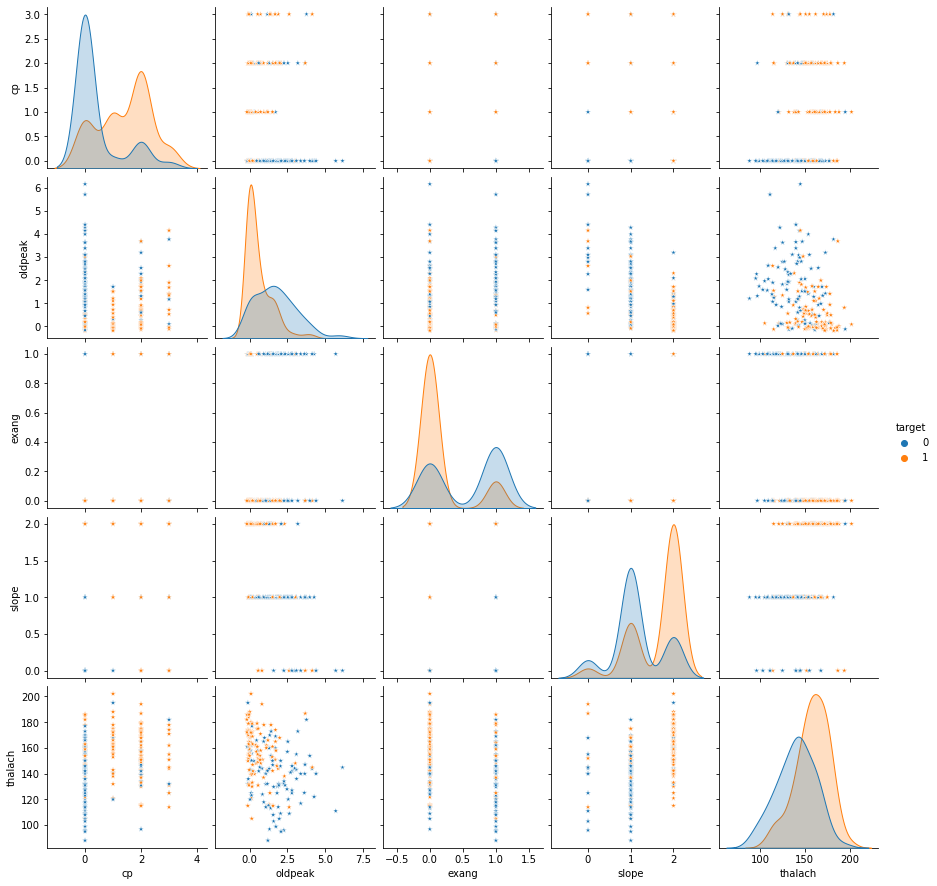

In [24]:
sns.pairplot(heart, hue="target",markers="*", vars= ['cp','oldpeak','exang','slope','thalach'])

#### Question 1.4 : Statistical Parameters

In [25]:
mean=heart.mean()
mean

age          54.311321
sex           0.688679
cp            0.957547
trestbps    131.784610
chol        244.133256
fbs           0.132075
restecg       0.560386
thalach     149.647978
exang         0.344340
oldpeak       1.113106
slope         1.423810
ca            0.731132
thal          2.355450
target        0.542453
dtype: float64

In [26]:
median=heart.median()
median

age          55.000000
sex           1.000000
cp            1.000000
trestbps    130.010256
chol        241.467023
fbs           0.000000
restecg       1.000000
thalach     151.939216
exang         0.000000
oldpeak       0.726060
slope         1.000000
ca            0.000000
thal          2.000000
target        1.000000
dtype: float64

In [27]:
var=heart.var()
var

age           83.637217
sex            0.215416
cp             1.045583
trestbps     326.063277
chol        2157.069050
fbs            0.115175
restecg        0.286384
thalach      487.358850
exang          0.226840
oldpeak        1.577304
slope          0.388904
ca             1.079026
thal           0.344482
target         0.249374
dtype: float64

In [28]:
kurtosis=heart.kurtosis()
kurtosis

age        -0.561563
sex        -1.339028
cp         -1.240674
trestbps    0.603542
chol        0.254413
fbs         2.817791
restecg    -1.180532
thalach    -0.214108
exang      -1.579550
oldpeak     1.363172
slope      -0.567830
ca          1.020304
thal       -0.676980
target     -1.989397
dtype: float64

In [29]:
std=heart.std()
std

age          9.145339
sex          0.464130
cp           1.022537
trestbps    18.057222
chol        46.444257
fbs          0.339374
restecg      0.535149
thalach     22.076206
exang        0.476277
oldpeak      1.255908
slope        0.623622
ca           1.038762
thal         0.586926
target       0.499374
dtype: float64

In [30]:
skew=heart.skew()
skew

age        -0.106027
sex        -0.820789
cp          0.461438
trestbps    0.672687
chol        0.333700
fbs         2.188903
restecg     0.140468
thalach    -0.394100
exang       0.659880
oldpeak     1.224053
slope      -0.604086
ca          1.377751
thal       -0.276223
target     -0.171644
dtype: float64

Mean, median, skew, variance and kurtosis is calculated for all features. 

It is observed that features age, sex, thalach, slope, thal and target are negatively skewed which means that the mean for these features is less than median. 

Moreover, features like cp, trestbps, chol, fbs, restecg, exang, oldpeak and ca are positively skewed which means that the mean is greater than the median. Also, for features age, sex, cp, restecg, thalach, exang, slope, thal and target the kurtosis is negative which means that the histogram distribution has flat tails. Furthermore, features trestbps, chol, fbs, oldpeak and ca shows leptokurtic behavior which means the distributions has heavy tails.

## CM3: Outlier check with Boxplot and IQR :

#### Plotting boxplot for outliers for the following 5 features:
1. 'cp', 
2. 'oldpeak', 
3. 'exang', 
4. 'slope', 
5. 'thalach'

Here 'oldpeak' and 'thalach' are the numeric variable feature only. We will look outliers in them.

In [31]:
#IQR range , lower limit, upper limit calculation

Q1=heart.quantile(0.25) #First Quartile
Q3=heart.quantile(0.75)  #Second Quartile
IQR=Q3-Q1 #Cutoff
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR


In [32]:
lower

age          26.000000
sex          -1.500000
cp           -3.000000
trestbps     89.972080
chol        121.197653
fbs           0.000000
restecg      -1.500000
thalach      91.976883
exang        -1.500000
oldpeak      -2.598153
slope        -0.500000
ca           -1.500000
thal          0.500000
target       -1.500000
dtype: float64

In [33]:
upper

age          82.000000
sex           2.500000
cp            5.000000
trestbps    169.961504
chol        363.256163
fbs           0.000000
restecg       2.500000
thalach     209.230018
exang         2.500000
oldpeak       4.465664
slope         3.500000
ca            2.500000
thal          4.500000
target        2.500000
dtype: float64

<AxesSubplot:ylabel='thalach'>

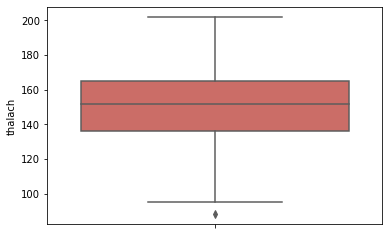

In [34]:
sns.boxplot(y='thalach', data=heart, palette='hls')

We can see that, there is one  outtlier in 'thalach'

<AxesSubplot:ylabel='oldpeak'>

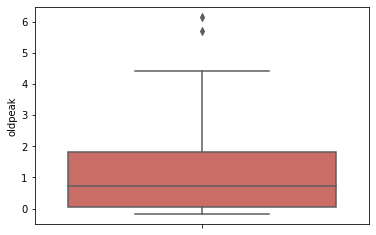

In [35]:
sns.boxplot(y='oldpeak', data=heart, palette='hls')

We can see that, there are two  outtlier in 'oldpeak'

In [36]:
thalach_l=lower.thalach
thalach_up=upper.thalach
print('For thalach : Q1=%.4f, Q3=%.4f ,IQR= %.4f, lower_limit=%.4f, upper_limit=%.4f' %(Q1.thalach,Q3.thalach, IQR.thalach,thalach_l,thalach_up))
#thalach_ol is index of outliers in thalach , 1 no. of outliers
thalach_ol=heart[(heart['thalach']<thalach_l) | (heart['thalach']>thalach_up)]['thalach'].index
thalach_ol

For thalach : Q1=135.9468, Q3=165.2601 ,IQR= 29.3133, lower_limit=91.9769, upper_limit=209.2300


Int64Index([35], dtype='int64')

[One outlier is at index 35 in ' thalach']

In [37]:
oldpeak_l=lower.oldpeak
oldpeak_up=upper.oldpeak
print('For thalach : Q1=%.4f, Q3=%.4f ,IQR= %.4f, lower_limit=%.4f, upper_limit=%.4f' %(Q1.oldpeak,Q3.oldpeak, IQR.oldpeak,oldpeak_l,oldpeak_up))
#oldpeak_ol is index of outliers in oldpeak , 1 no. of outliers
oldpeak_ol=heart[(heart['oldpeak']<oldpeak_l) | (heart['oldpeak']>oldpeak_up)]['oldpeak'].index
oldpeak_ol

For thalach : Q1=0.0508, Q3=1.8167 ,IQR= 1.7660, lower_limit=-2.5982, upper_limit=4.4657


Int64Index([130, 171], dtype='int64')

[Two outliers are at index 130,171 in ' oldpeak']

In [38]:
median.thalach, mean.thalach

(151.93921566009521, 149.64797812718098)

In [39]:
median.oldpeak , mean.oldpeak

(0.7260599084198476, 1.1131058111583108)

In [40]:
#Here, we are having dataset with 212 observations
#Replacing 3 outlier with mean, will not give biased output
heart.loc[thalach_ol,'thalach'] = mean.thalach
heart.loc[oldpeak_ol,'oldpeak'] = mean.oldpeak

In [41]:
#For check , outliers at index 35 (thalach) , 130,171 (oldpeak) are replaced by respective median
heart.loc[[35,130,171]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
35,57,1,0,152.010765,274.011716,0,1.0,149.647978,1,1.211774,1.0,1,3.0,0
130,55,1,0,140.055857,217.092555,0,1.0,110.980330,1,1.113106,0.0,0,3.0,0
171,62,0,0,160.023407,164.216283,0,0.0,144.876358,0,1.113106,0.0,3,3.0,0


#### By plotting a boxplot of thalach and oldpeak, it can be seen that there is 1 outlier (index 35) is thalach and 2 outliers (index 130 and 171) in oldpeak. These outliers are replaced with the mean of the respective feature. There are no negative values observed in this dataset. 

### CM4 :Histogram Question

#### Binary Variable feature

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'exang'}>, <AxesSubplot:>]],
      dtype=object)

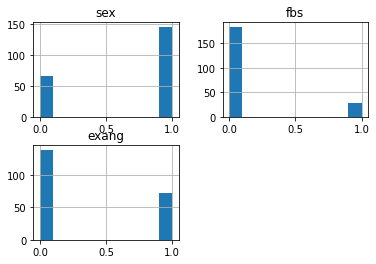

In [778]:
binary= heart[['sex','fbs','exang']]
binary.hist()

<AxesSubplot:xlabel='sex', ylabel='count'>

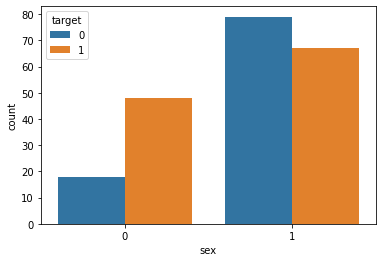

In [779]:
sns.countplot(x='sex',hue='target', data=heart)
#sex (0 = female; 1 = male)

<AxesSubplot:xlabel='fbs', ylabel='count'>

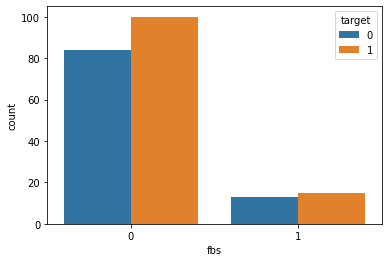

In [780]:
sns.countplot(x='fbs', hue='target', data=heart)
#fbs: Fasting blood sugar > 120 mg/dl 
# 1 = True , 0 = False

<AxesSubplot:xlabel='exang', ylabel='count'>

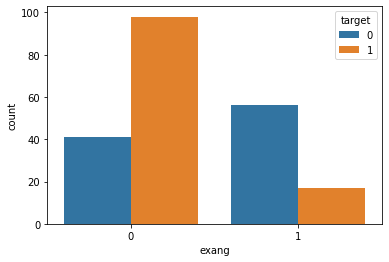

In [781]:
sns.countplot(x='exang', hue='target', data=heart)
#exang: Exercise induced angina (0 = no; 1 = yes)

### Categorical Variable Feature

array([[<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'slope'}>, <AxesSubplot:>]],
      dtype=object)

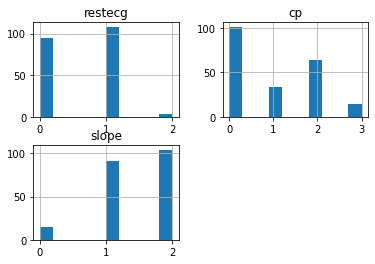

In [782]:
cat= heart[['restecg','cp','slope']]
cat.hist()

<AxesSubplot:xlabel='restecg', ylabel='count'>

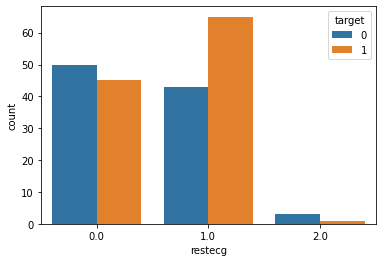

In [783]:
sns.countplot(x='restecg', hue='target', data=heart)
#restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)

<AxesSubplot:xlabel='cp', ylabel='count'>

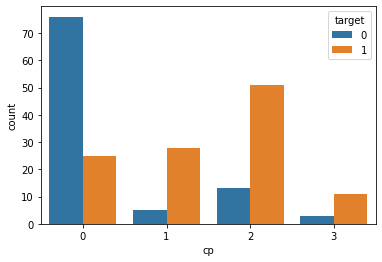

In [784]:
sns.countplot(x='cp', hue='target', data=heart)
#cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)

<AxesSubplot:xlabel='slope', ylabel='count'>

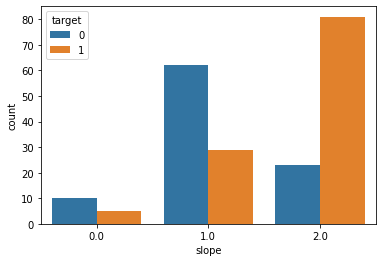

In [785]:
sns.countplot(x='slope', hue='target', data=heart)
#slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)

<AxesSubplot:xlabel='thal', ylabel='count'>

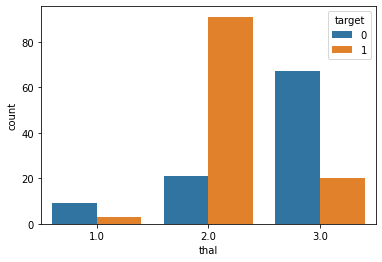

In [786]:
sns.countplot(x='thal', hue='target', data=heart)
#thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)

## Ordinal Feature Variable

<AxesSubplot:xlabel='ca', ylabel='count'>

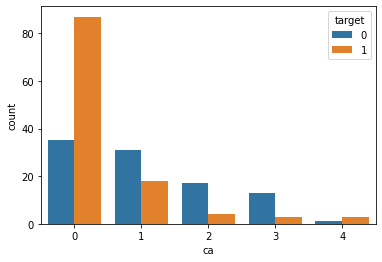

In [787]:
sns.countplot(x='ca', hue='target', data=heart)
##ca: number of major vessels (0-3) colored by flourosopy

Out of 13 features, 5 features are quantitative,numeric features i.e. age, trestbps, chol, thalach and oldpeak. So for these numeric features, it is not feasible to plot histogram against target to determine the number of present and absent heart disease. 
The other features are divided into following categories:
1.	Binary variable: sex, fbs and exang.
2.	Categorical variable: restecg, cp, slope, thal (after removing noise).
3.	Ordinal variable: ca.
Histogram is plotted for each of the 8 variables to determine the count of present and absent heart disease. And we can observe


From the above plots we can observe the following : 
1. Males are having more heart diseases than females
2. People with fbs>120 have lower effect on heart disease
3. People without Exang, exercises induced angina can be at risk for heart disease.
4. People with normal thalium stress test result can be at higher risk for heart disease.
5. Flat slope is critical indication of having heart disease
6. 'Non-angina CP' is one of the parameter for heart disease risk
7. One with normal restecg can have heart disease,too.
8. colored flouroscopy having negligible effect on heart disease as one with zero number are having higher risk of heart disease.

## CM5 :

In [42]:
heart.shape

(212, 14)

In [43]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


####  From the above data insights we can see that , there are null values in 'trestbps', 'chol' , 'restecg', 'thalach',  'oldpeak', 'slope', 'thal'

In [44]:
#all the missing data , following commands will give insights about the missing data
trestm=heart['trestbps'].isna()
cholm=heart['chol'].isna()
restm=heart['restecg'].isna()
thalachm=heart['thalach'].isna()
oldm=heart['oldpeak'].isna()
slopem=heart['slope'].isna()
thalm=heart['thal'].isna()

In [45]:
heart.loc[trestm,:] #Null values in trestbps: Resting blood pressure

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,40,1,0,NaN,166.893249,0,0.0,114.061921,1,1.897220,1.0,0,3.0,0
99,58,0,0,NaN,196.979453,0,1.0,130.933929,0,0.562475,1.0,0,2.0,1
118,57,1,2,NaN,168.018915,0,1.0,174.013401,0,1.713836,2.0,0,2.0,1
125,60,0,0,NaN,NaN,0,0.0,157.037770,0,2.504718,1.0,2,3.0,0
146,60,1,0,NaN,229.918255,1,1.0,159.900299,1,1.285934,2.0,2,3.0,0
156,65,1,0,NaN,253.974040,0,0.0,127.029351,0,2.804510,1.0,1,3.0,0
207,56,1,2,NaN,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0


In [46]:
heart.loc[cholm,:] #Null values in chol: Serum cholestoral in mg/dl

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
22,40,1,3,139.874175,NaN,0,1.0,177.933194,1,1.416943,2.0,0,3.0,1
42,56,0,0,134.004163,NaN,0,0.0,150.043961,1,2.059181,1.0,2,3.0,0
58,64,1,2,139.958522,NaN,0,1.0,157.852338,0,0.007978,2.0,0,2.0,0
77,48,1,1,109.992976,NaN,0,1.0,167.823859,0,NaN,0.0,0,3.0,0
78,50,0,0,110.098800,NaN,0,0.0,158.896136,0,NaN,2.0,0,2.0,1
125,60,0,0,NaN,NaN,0,0.0,157.037770,0,2.504718,1.0,2,3.0,0
135,54,1,0,124.035646,NaN,0,0.0,109.048112,1,2.051862,1.0,1,3.0,0
136,70,1,1,156.105051,NaN,0,0.0,142.929718,0,-0.023487,2.0,0,2.0,1
158,54,1,0,139.939931,NaN,0,1.0,159.971291,0,1.108075,2.0,0,2.0,1


In [47]:
heart.loc[restm,:] # Null values in restecg: Resting ECG

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
23,44,1,1,129.826285,219.137169,0,NaN,188.099808,0,0.007390,2.0,0,2.0,1
43,44,1,0,109.959500,197.002373,0,NaN,177.029060,0,0.150234,2.0,1,2.0,0
62,69,0,3,140.170156,239.295986,0,NaN,150.885498,0,1.688282,2.0,2,2.0,1
155,46,1,1,101.106337,196.953211,1,NaN,155.911895,0,-0.008399,2.0,0,3.0,1
160,59,1,0,137.997884,271.074010,0,NaN,182.080145,0,-0.185668,2.0,0,2.0,1


In [48]:
heart.loc[thalachm,:] #Null values in thalach: Maximum heart rate achieved during thalium stress test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,2,119.900334,339.874109,0,1.0,NaN,0,-0.080278,2.0,0,2.0,1
83,43,1,0,150.013416,247.050289,0,1.0,NaN,0,1.554232,2.0,0,2.0,1
122,43,1,2,130.048556,315.102352,0,1.0,NaN,0,2.093012,2.0,1,2.0,1
203,61,1,0,139.931504,206.958953,0,0.0,NaN,1,2.093503,2.0,1,3.0,0


In [49]:
heart.loc[oldm,:] #Null values in oldpeak: ST depression induced by exercise relative to rest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
20,56,1,3,119.968114,192.953625,0,0.0,161.944248,0,NaN,1.0,0,3.0,1
24,39,0,2,137.920561,219.891899,0,1.0,151.922641,0,NaN,1.0,0,2.0,1
29,45,0,1,111.965183,160.105091,0,1.0,137.948412,0,NaN,1.0,0,2.0,1
48,42,0,0,102.090058,265.098620,0,0.0,121.758282,0,NaN,1.0,0,2.0,1
50,44,0,2,117.908590,241.855057,0,1.0,148.932653,0,NaN,1.0,1,2.0,1
77,48,1,1,109.992976,NaN,0,1.0,167.823859,0,NaN,0.0,0,3.0,0
78,50,0,0,110.098800,NaN,0,0.0,158.896136,0,NaN,2.0,0,2.0,1
112,45,1,0,115.056026,259.757227,0,0.0,185.120250,0,NaN,2.0,0,2.0,1
123,49,1,2,120.001137,188.143634,0,1.0,139.063514,0,NaN,1.0,3,3.0,0
142,48,1,2,123.930848,254.910043,1,1.0,175.017165,0,NaN,2.0,2,2.0,1


In [50]:
heart.loc[slopem,:] #Null values in slope:Slope of the peak exercise ST segment

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
17,62,0,2,129.976144,262.965808,0,1.0,96.833885,0,1.318529,NaN,1,3.0,0
26,63,1,0,139.854624,186.925438,0,0.0,143.923875,1,4.141286,NaN,2,3.0,0


In [51]:
heart.loc[thalm,:] #Null values in thal: Thalium stress test result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
177,53,0,2,127.958272,216.168147,0,0.0,115.053919,0,-0.119541,2.0,0,NaN,1


####  We can replace mean in null in trestbps, chol,thalach,oldpeak (Numeric Variables) and forward fill in categorical variables thal,restecg and slope

In [52]:
#filled with mean data= heartF
heart1=heart[['age','sex','cp','fbs','exang','ca']]
heart2=heart[['trestbps','chol','thalach','oldpeak']].fillna(mean)
heart3=heart[['restecg','slope','thal']].fillna(method='ffill')
heart4=heart[['target']]
heartF=pd.concat([heart1,heart2,heart3,heart4],axis=1)
heartF

,age,sex,cp,fbs,exang,ca,trestbps,chol,thalach,oldpeak,restecg,slope,thal,target
0,76,0,2,0,0,0,140.102822,197.105970,115.952071,1.284822,2.0,1.0,2.0,1
1,43,0,0,1,1,0,132.079599,341.049462,135.970028,3.110483,0.0,1.0,3.0,0
2,47,1,2,0,0,0,107.899290,242.822816,152.210039,-0.023723,1.0,2.0,2.0,0
3,51,1,2,0,1,0,99.934001,244.133256,143.049207,1.195082,1.0,1.0,2.0,1
4,57,1,0,0,1,1,110.103508,334.952353,143.099327,3.082052,1.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,1,1,1,131.784610,256.189595,141.981335,0.606726,0.0,1.0,1.0,0
208,57,0,0,0,0,1,127.981407,302.985611,158.992132,1.113106,0.0,2.0,2.0,1
209,54,1,2,0,0,0,150.188534,232.117551,164.977674,1.715230,0.0,2.0,3.0,1
210,41,1,2,0,0,0,129.918793,214.008059,167.851493,1.992138,0.0,1.0,2.0,1


In [53]:
heartF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   fbs       212 non-null    int64  
 4   exang     212 non-null    int64  
 5   ca        212 non-null    int64  
 6   trestbps  212 non-null    float64
 7   chol      212 non-null    float64
 8   thalach   212 non-null    float64
 9   oldpeak   212 non-null    float64
 10  restecg   212 non-null    float64
 11  slope     212 non-null    float64
 12  thal      212 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


'Now there are no null values in dataset. 

[CM5] :

By applying heart.info() function, it is observed that there are null values in trestbps (7 null values), chol (10 null values), restecg (5 null values), thalach (4 null values), oldpeak (2 null values), slope (2 null values) and thal (1 null value). So, the null values in numeric features like trestbps, chol, thalach and oldpeak are replaced with the mean of respective feature. Replacing numeric variable values with median are not having significant effect on our model accuracy.


Moreover, the null values in categorical features like thal, restecg and slope is replaced with ffill method which replaces the null value with the last observed value. 

## Question 2 : KNN

[Question 2.1] 

Basic Model [BEFORE NORMALISATION (SCALING)]

We are checking correlation again ,after replacing null values and outliers

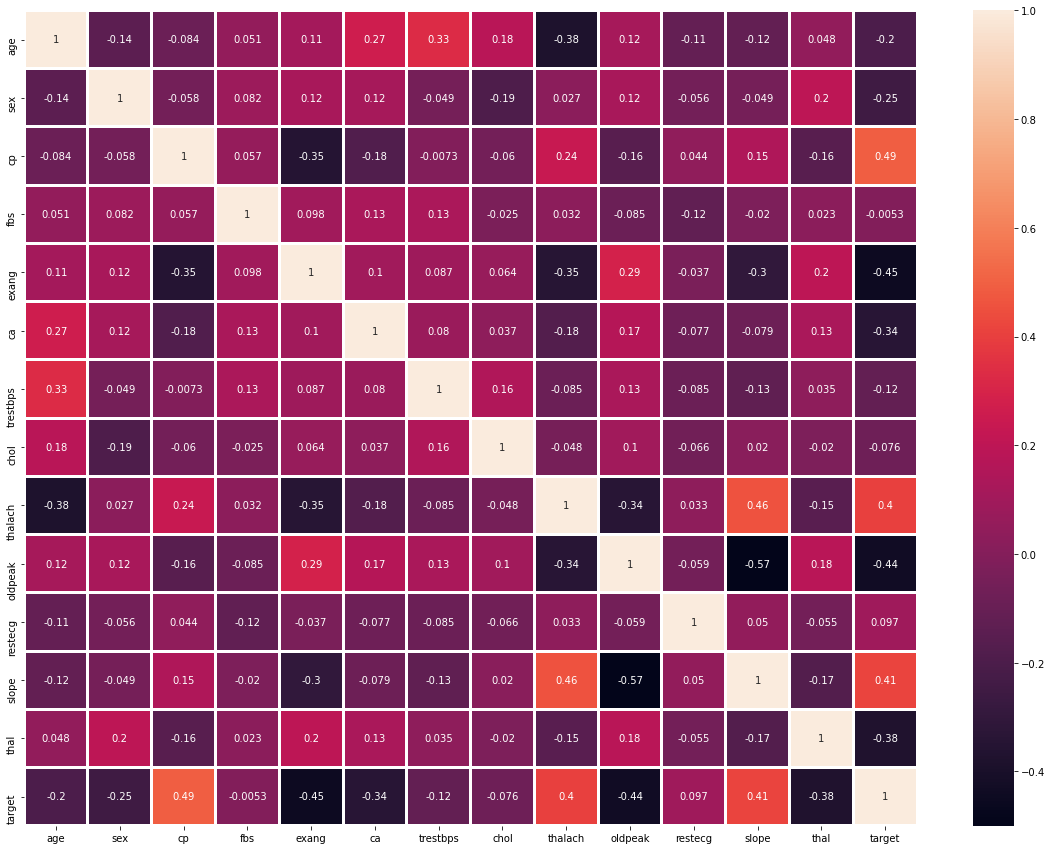

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(heartF.corr(), annot=True , linecolor='white',linewidth='2', vmin='-0.5',vmax='1');

In [55]:
#Now, Segregation of a feature , considering most correlating features 'cp','oldpeak','exang','slope','thalach' only
heartF=heartF.drop(['age','sex','trestbps','chol', 'fbs', 'restecg','ca','thal'],axis=1) 

In [56]:
# One hot encoding (Binary encoding) 
# Creating the dummies for the categorical (cp, slope) , binary feature(exang)
heartF= pd.get_dummies(heartF, columns=['exang','cp','slope']) 
heartF.head()

,thalach,oldpeak,target,exang_0,exang_1,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0
0,115.952071,1.284822,1,1,0,0,0,1,0,0,1,0
1,135.970028,3.110483,0,0,1,1,0,0,0,0,1,0
2,152.210039,-0.023723,0,1,0,0,0,1,0,0,0,1
3,143.049207,1.195082,1,0,1,0,0,1,0,0,1,0
4,143.099327,3.082052,0,0,1,1,0,0,0,0,1,0


In [57]:
x_heartF=heartF.drop(['target'],axis=1) #For train-test-split
x_heartF.head()

,thalach,oldpeak,exang_0,exang_1,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0
0,115.952071,1.284822,1,0,0,0,1,0,0,1,0
1,135.970028,3.110483,0,1,1,0,0,0,0,1,0
2,152.210039,-0.023723,1,0,0,0,1,0,0,0,1
3,143.049207,1.195082,0,1,0,0,1,0,0,1,0
4,143.099327,3.082052,0,1,1,0,0,0,0,1,0


In [58]:
x_heartF.shape

(212, 11)

In [59]:
#Segregation of Target , one with which we will know that disease is positive or not
y_heartF=heartF['target']
y_heartF.shape

(212,)

###### Splitting the dataset in training , validation and testing

In [60]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_heartF,y_heartF,test_size=0.4, random_state=275)

In [61]:
x_test,x_val,y_test,y_val = train_test_split(x_val,y_val,test_size=0.5, random_state=275)

In [62]:
#Question 2.1
print(x_train.shape,x_val.shape,x_test.shape)

(127, 11) (43, 11) (42, 11)


[Question 2.2]

In [63]:

#Training the model using the classifier
from sklearn.neighbors import KNeighborsClassifier
x=x_train
y=y_train
heart_model= KNeighborsClassifier()
heart_model.fit(x,y)
y_pred= heart_model.predict(x)

In [64]:
#Now For accuracy of the model
#accuracy is for (train model and tested on train data only )
from sklearn.metrics import accuracy_score
accuracy_score (y,y_pred)*100 #in percentage

77.16535433070865

In [65]:
x=x_train
y=y_train
heart_model= KNeighborsClassifier()
heart_model.fit(x,y)
y_pred= heart_model.predict(x_test)

In [67]:
#Accuracy_for default parameter, no change in knn classifier, is for Question 2.2 
accuracy_default=accuracy_score (y_test,y_pred)*100 #in percentage
accuracy_default

73.80952380952381

[Question 2.3]

In [73]:
#for k 
k= [1,5,10,15,20,25,30,35]
ac= []
for n in k:
    x=x_train
    y=y_train
    heart_model= KNeighborsClassifier(n_neighbors=n)
    heart_model.fit(x,y)
    y_pred= heart_model.predict(x_val)
    AC=accuracy_score(y_val,y_pred)*100 #Accuracy in percentage
    ac.append(AC)

for ks, accuracy in zip (k,ac):
    print("Accuracy for k= %r is %.3f percent" % (ks,accuracy))


Accuracy for k= 1 is 74.419 percent
Accuracy for k= 5 is 83.721 percent
Accuracy for k= 10 is 81.395 percent
Accuracy for k= 15 is 79.070 percent
Accuracy for k= 20 is 76.744 percent
Accuracy for k= 25 is 81.395 percent
Accuracy for k= 30 is 81.395 percent
Accuracy for k= 35 is 81.395 percent


### CM6 :

Text(0, 0.5, 'Accuracy')

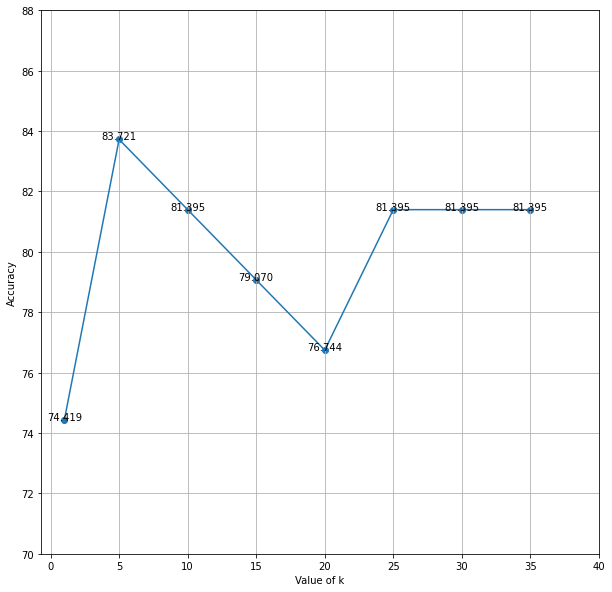

In [74]:
#For k=5 we are getting maximum validation accuracy
#Plotting  accuracy against k values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(k,ac)
plt.grid()
plt.plot(k,ac)
for x,y in zip (k,ac):
    label = "{:.3f}".format(y)
    plt.annotate ( label,#text to display
                  (x,y),# the points to label
                  ha='center') # ha is horizontal allignment . It can be left,center or right
plt.xticks(np.arange(0,45,5)) # On X axis starting with 0 till 45 with a difference of 5
plt.yticks(np.arange(70,90,2)) # On Y axis starting with 70 till 90 with a difference of 2
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

In [75]:
max_ac=max(ac)
max_ac

83.72093023255815

###### The best k value considering the maximum accuracy is 5 ,after that we can see that the accuracy is decreasing

## CM7 :

##### 2.4 Accuracy of test dataset, AUC score and f1-score

In [76]:
#Best Value of k=5 taken considering the accuracies, as after that the accuracy is decreasing as per above graph
x=x_train
y=y_train
heart_model= KNeighborsClassifier(n_neighbors=5)
heart_model.fit(x,y)
y_pred= heart_model.predict(x_test)

In [77]:
ac_t=accuracy_score(y_test,y_pred)*100
print ("Accuracy score ac_t for basic model = %.3f percent" %ac_t)

Accuracy score ac_t for basic model = 73.810 percent


In [78]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
AUC=sklearn.metrics.roc_auc_score(y_test,y_pred,multi_class='ovo')
print ("AUC = % 4f" %AUC)

AUC =  0.766667


In [79]:
#f1 score with average=macro as per instruction
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test, y_pred, average='macro')
print ('f1 score is %.4f' % f1_macro)

f1 score is 0.7343


###### For basic model :
1. Accuracy score ac_t for basic model = 73.810 percent
2. AUC = 0.76667
3. f1 score = 0.7343

### Question 2.5 : 'NORMALISATION' 
From two scalling method we are doing standard scaler , scalling , Z-score normalisation

In [80]:
#Scaling
from sklearn.preprocessing import StandardScaler
#data before scaling 
heartF_n=pd.DataFrame(heartF)
heartF_n.head()

,thalach,oldpeak,target,exang_0,exang_1,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0
0,115.952071,1.284822,1,1,0,0,0,1,0,0,1,0
1,135.970028,3.110483,0,0,1,1,0,0,0,0,1,0
2,152.210039,-0.023723,0,1,0,0,0,1,0,0,0,1
3,143.049207,1.195082,1,0,1,0,0,1,0,0,1,0
4,143.099327,3.082052,0,0,1,1,0,0,0,0,1,0


In [81]:
columns_to_scale=['thalach','oldpeak']
heartF_n[columns_to_scale]=StandardScaler().fit_transform(heartF_n[columns_to_scale])
heartF_n.head()

,thalach,oldpeak,target,exang_0,exang_1,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0
0,-1.588308,0.193556,1,1,0,0,0,1,0,0,1,0
1,-0.652800,1.820649,0,0,1,1,0,0,0,0,1,0
2,0.106151,-0.972666,0,1,0,0,0,1,0,0,0,1
3,-0.321966,0.113576,1,0,1,0,0,1,0,0,1,0
4,-0.319624,1.795311,0,0,1,1,0,0,0,0,1,0


In [82]:
#segregation of a feature , considering most correlating features 'cp','oldpeak','exang','slope','thalach' only
x_heartF1=heartF_n.drop(['target'],axis=1)
x_heartF1.head()

,thalach,oldpeak,exang_0,exang_1,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0
0,-1.588308,0.193556,1,0,0,0,1,0,0,1,0
1,-0.652800,1.820649,0,1,1,0,0,0,0,1,0
2,0.106151,-0.972666,1,0,0,0,1,0,0,0,1
3,-0.321966,0.113576,0,1,0,0,1,0,0,1,0
4,-0.319624,1.795311,0,1,1,0,0,0,0,1,0


In [83]:
x_heartF1.shape

(212, 11)

In [84]:
#Segregation of Target , one with which we will know that disease is positive or not
y_heartF1=heartF_n['target']
y_heartF1.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [85]:
y_heartF1.shape

(212,)

In [86]:
#Splitting the dataset in training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train1,x_val1,y_train1,y_val1 = train_test_split(x_heartF1,y_heartF1,test_size=0.4, random_state=275)


In [87]:
x_test1,x_val1,y_test1,y_val1 = train_test_split(x_val1,y_val1,test_size=0.5, random_state=275)

In [88]:
#Question 2.1
print(x_train1.shape,x_val1.shape,x_test1.shape)

(127, 11) (43, 11) (42, 11)


In [89]:
#Question 2.2 
#Training the model using the classifier
from sklearn.neighbors import KNeighborsClassifier
x=x_train1
y=y_train1
heart_model= KNeighborsClassifier()
heart_model.fit(x,y)
y_pred= heart_model.predict(x)

In [90]:
#Now For accuracy of the model
#accuracy is for (train model and tested on train data only )
from sklearn.metrics import accuracy_score
accuracy_score (y,y_pred)*100 #In percentage

81.88976377952756

In [91]:
x=x_train1
y=y_train1
heart_model= KNeighborsClassifier()
heart_model.fit(x,y)
y_pred= heart_model.predict(x_test1)

In [92]:
#Accuracy_for default parameter, no change in knn classifier, is for Question 2.2 
accuracy_default=accuracy_score (y_test1, y_pred)*100  #In percentage
accuracy_default

78.57142857142857

In [93]:
#for k 
k= [1,5,10,15,20,25,30,35]
ac= []
for n in k:
    x=x_train1
    y=y_train1
    heart_model= KNeighborsClassifier(n_neighbors=n)
    heart_model.fit(x,y)
    y_pred= heart_model.predict(x_val1)
    AC=accuracy_score(y_val1,y_pred)*100 # In percentage
    ac.append(AC)

for ks1, accuracy in zip (k,ac):
    print("Accuracy for k= %r is %.3f percent" % (ks1,accuracy))

Accuracy for k= 1 is 62.791 percent
Accuracy for k= 5 is 58.140 percent
Accuracy for k= 10 is 60.465 percent
Accuracy for k= 15 is 69.767 percent
Accuracy for k= 20 is 69.767 percent
Accuracy for k= 25 is 81.395 percent
Accuracy for k= 30 is 76.744 percent
Accuracy for k= 35 is 76.744 percent


Text(0, 0.5, 'Accuracy')

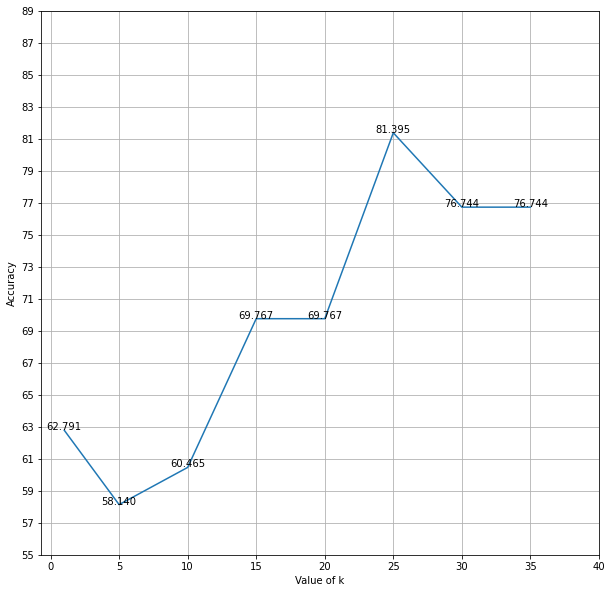

In [98]:
#For k=25 we are getting maximum validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(k,ac)
for x,y in zip (k,ac):
    label = "{:.3f}".format(y)
    plt.annotate ( label,#text to display
                  (x,y),# the points to label
                  ha='center') # ha is horizontal allignment . It can be left,center or right
plt.xticks(np.arange(0,45,5)) # On X axis starting with 0 till 45 with a difference of 5
plt.yticks(np.arange(55,90,2)) # On Y axis starting with 55 till 90 with a difference of 2
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

In [104]:
max_ac=max(ac)
max_ac

81.3953488372093

In [105]:
#Best Value of k=25 taken considering the accuracies
x=x_train1
y=y_train1
heart_model= KNeighborsClassifier(n_neighbors=25)
heart_model.fit(x,y)
y_pred= heart_model.predict(x_test1)

In [106]:
ac_t=accuracy_score(y_test1,y_pred)*100

print ("Accuracy score ac_t = %.3f percent" %ac_t )

Accuracy score ac_t = 80.952 percent


In [107]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
AUC_n=sklearn.metrics.roc_auc_score(y_test1,y_pred,multi_class='ovo')
print ("Afer normalisation AUC = %.6f " %AUC_n )

Afer normalisation AUC = 0.822222 


In [108]:
#f1 score with average=macro as per instruction
from sklearn.metrics import f1_score
f1_macro_n=f1_score(y_test1, y_pred, average='macro')
print ("Afer normalisation f1_score = %.6f " %f1_macro_n )

Afer normalisation f1_score = 0.802353 


### 2.6 : Weighted KNN
[With default (minkowski) , Euclidian and manhattan distance]

In [109]:
metric= ['minkowski', 'euclidean' , 'manhattan']
ac_weighted= []
for m in metric:
    x=x_train1
    y=y_train1
    heart_model= KNeighborsClassifier(n_neighbors=25, metric = m, weights= 'distance')
    heart_model.fit(x,y)
    y_pred= heart_model.predict(x_val1)
    ac_w=accuracy_score(y_val1,y_pred)*100 # In percentage
    ac_weighted.append(ac_w)
ac_weighted

[79.06976744186046, 79.06976744186046, 72.09302325581395]

#### We can see that model is improved with normalisation , weighted KNN has lower accuracy (comparatively)
#### Due to this we are considering final best improved model, after normalisation one only.

### CM7 : Accuracy, AUC and F1-score of best model : 

In [110]:
# ac_t is the best accuracy while testing on test set , after normalisation ( Z score normalisation).

print ("Accuracy score after normalisation , ac_t = %.3f percent" %ac_t )

Accuracy score after normalisation , ac_t = 80.952 percent


In [111]:
# AUC_n is AUC score after normalisation ( Z score normalisation)
print ("Afer normalisation AUC = %.6f " %AUC_n )

Afer normalisation AUC = 0.822222 


In [112]:
#f1_macro_n is f1_score after normalisation ( Z score normalisation)
print ("Afer normalisation f1_score = %.6f " %f1_macro_n )

Afer normalisation f1_score = 0.802353 


### CM7 Results 

(Before normalization) Basic Model :

Validating the model at k=5, gives best validation accuracy 83.72%.

1. Accuracy for test dataset is 73.81%.
2. AUC- 0.7667
3. F1 score- 0.7343

(After normalization)

Validating the model at k=25, gives best accuracy 81.39%. 

1. Accuracy after testing on test dataset is 80.95% with k=25
2. AUC- 0.8222
3. F1 score- 0.802

By weighted KNN method, it is observed that the accuracy is reduced compared to the normalization method. Thus, the improved model is the one with normalization.
Accuracy for test dataset is 80.95%.
AUC- 0.8222
F1 score- 0.802
